In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [11]:
print(f'pandas      {pd.__version__}')             # was 0.23.3  :  upgraded to 1.0.1
# ! pip install pandas              # left the version at 2.1.0 as 'Requirement already satisfied'
# ! pip install pandas==1.0.1       # worked, also upgraded numpy from 1.12.1 to 1.18.1
# AFTER FIRST INSTALLED, must restart kernel in order to load new version.

pandas      1.0.1


In [12]:
import matplotlib
print(f'matplotlib  {matplotlib.__version__}')     # was 2.1.0   :  upgraded to 3.2.0
# ! pip install matplotlib          # left the version at 2.1.0 as 'Requirement already satisfied'
# ! pip install 'matplotlib>=2.2'   # left the version at 2.1.0 as 'Requirement already satisfied'
# ! pip install "matplotlib==2.2"   # worked
# ! pip install "matplotlib==3.2"   # worked, also installed kiwisolver-1.1.0
# AFTER FIRST INSTALLED, must restart kernel in order to load new version.

matplotlib  3.2.0


In [13]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [14]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Bivariate Exploration

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

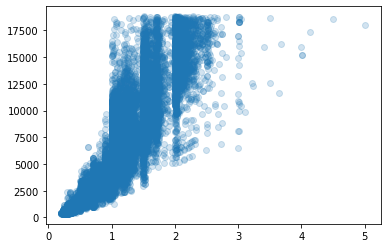

In [15]:
# bivariate plot of price vs. carat
plt.scatter(data=diamonds, x='carat', y='price', alpha=1/5);

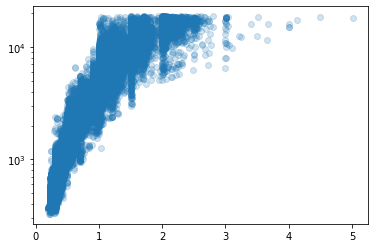

In [22]:
# bivariate plot of price vs. carat
plt.scatter(data=diamonds, x='carat', y='price', alpha=1/5);
plt.yscale('log')

In [25]:
import numpy as np
# from numpy import ma
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
# from matplotlib.ticker import Formatter, FixedLocator

class CubeRootScale(mscale.ScaleBase):
    """
    The scale function:
      y ** (1/3)

    The inverse scale function:
      y ** 3
    """

    # The scale class must have a member ``name`` that defines the string used
    # to select the scale.  For example, ``gca().set_yscale("cuberoot")`` would
    # be used to select this scale.
    name = 'cuberoot'

    def __init__(self, axis, **kwargs):
        """
        Any keyword arguments passed to ``set_xscale`` and ``set_yscale`` will
        be passed along to the scale's constructor.
        """
        super().__init__(axis)

    def get_transform(self):
        """
        Override this method to return a new instance that does the
        actual transformation of the data.

        The CubeRootTransform class is defined below as a
        nested class of this one.
        """
        return self.CubeRootTransform()

    def set_default_locators_and_formatters(self, axis):
        """
        Override to set up the locators and formatters to use with the
        scale.  This is only required if the scale requires custom
        locators and formatters.  Writing custom locators and
        formatters is rather outside the scope of this example, but
        there are many helpful examples in ``ticker.py``.
        
        Or see the MercatorLatitudeScale example on the web.
        """
        pass

    def limit_range_for_scale(self, vmin, vmax, minpos):
        """
        Override to limit the bounds of the axis to the domain of the
        transform.  In the case of Mercator, the bounds should be
        limited to the threshold that was passed in.  Unlike the
        autoscaling provided by the tick locators, this range limiting
        will always be adhered to, whether the axis range is set
        manually, determined automatically or changed through panning
        and zooming.
        """
        return vmin, vmax

    class CubeRootTransform(mtransforms.Transform):
        # There are two value members that must be defined.
        # ``input_dims`` and ``output_dims`` specify number of input
        # dimensions and output dimensions to the transformation.
        # These are used by the transformation framework to do some
        # error checking and prevent incompatible transformations from
        # being connected together.  When defining transforms for a
        # scale, which are, by definition, separable and have only one
        # dimension, these members should always be set to 1.
        input_dims = 1
        output_dims = 1
        is_separable = True
        has_inverse = True

        def __init__(self):
            mtransforms.Transform.__init__(self)

        def transform_non_affine(self, a):
            """
            This transform takes an Nx1 ``numpy`` array and returns a
            transformed copy. Importantly, the ``transform`` method *must*
            return an array that is the same shape as the input array, since
            these values need to remain synchronized with values in the
            other dimension.
            """
            return np.cbrt(a)

        def inverted(self):
            """
            Override this method so matplotlib knows how to get the
            inverse transform for this transform.
            """
            return CubeRootScale.CubeTransform()

    class CubeTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True
        has_inverse = True

        def __init__(self):
            mtransforms.Transform.__init__(self)

        def transform_non_affine(self, a):
            return a ** 3

        def inverted(self):
            return CubeRootScale.CubeRootTransform()

# Now that the Scale class has been defined, it must be registered so
# that ``matplotlib`` can find it.
mscale.register_scale(CubeRootScale)

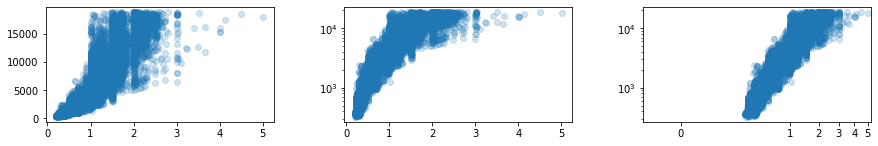

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(13,3))
fig.tight_layout(pad=4.0)

ax1.scatter(data=diamonds, x='carat', y='price', alpha=1/5);

ax2.scatter(data=diamonds, x='carat', y='price', alpha=1/5);
ax2.set(yscale="log");

ax3.scatter(data=diamonds, x='carat', y='price', alpha=1/5);

import collections.abc
import numpy as np

# cube = lambda x : x ** 3
# cube_root = lambda x : x ** (1./3.) if 0 <= x else - (-x) ** (1./3.)
def OLD_cube_root(x):
    print(type(x))
    if isinstance(x, collections.abc.Sequence) :
        return map(cube_root, x)
    if isinstance(x, tuple) :
        return tuple(map(cube_root, x))
    if isinstance(x, pd.Series) :
        return map(cube_root, x)
    if isinstance(x, numpy.ndarray) :
        return map(cube_root, x)
    if 0 <= x :
        return x ** (1./3.)
    return - (-x) ** (1./3.)

ax3.set_yscale('log');
ax3.set_xscale('cuberoot');

def cube_root(x):
    if 0 <= x :
        return x ** (1./3.)
    return - (-x) ** (1./3.)

def cube(x):
    return x ** 3

# v_cube_root = np.vectorize(cube_root)
# v_cube = np.vectorize(cube)
# ax3.set_xscale('function', functions=(v_cube_root, v_cube));

def forward(x):
    return x**(1/2)
def inverse(x):
    return x**2
# ax3.set_xscale('function', functions=(forward, inverse))

Price vs. Carat comment 1: <span style="color:white">Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. In either case, you should recall that the price distribution suggests a logarithmic transformation due to its very long tail. If you haven't tried it yet, add a transformation to the price axis.</span>

Price vs. Carat comment 2: <span style="color:white">Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.</span>

Price vs. Carat comment 3: <span style="color:white">One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.</span>

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

In [9]:
# bivariate plots of price vs. cut, color, clarity


Price vs. Categorical comment 1: <span style="color:white">There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?</span>

Price vs. Categorical comment 2: <span style="color:white">With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.</span>

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

In [10]:
# bivariate plots of carat vs. cut, color, clarity


Carat vs. Categorical comment: <span style="color:white">These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.</span>